## Prophet forecasting model 

### import dependencies


In [1]:
from prophet import Prophet 
import pandas as pd
from matplotlib import pyplot as plt

C:\Users\dhyey\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


### load the dataset into dataframe

In [2]:
data = pd.read_csv('H:\Dhyey\RIL-internship\JULY\datasets\peyton_manning.csv')
data.dropna(inplace=True)
data

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


### removing outliers to improve accuracy

In [3]:
def remove_outliers_iqr(data, column='y'):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

df = remove_outliers_iqr(data)

### Plotting original dataset

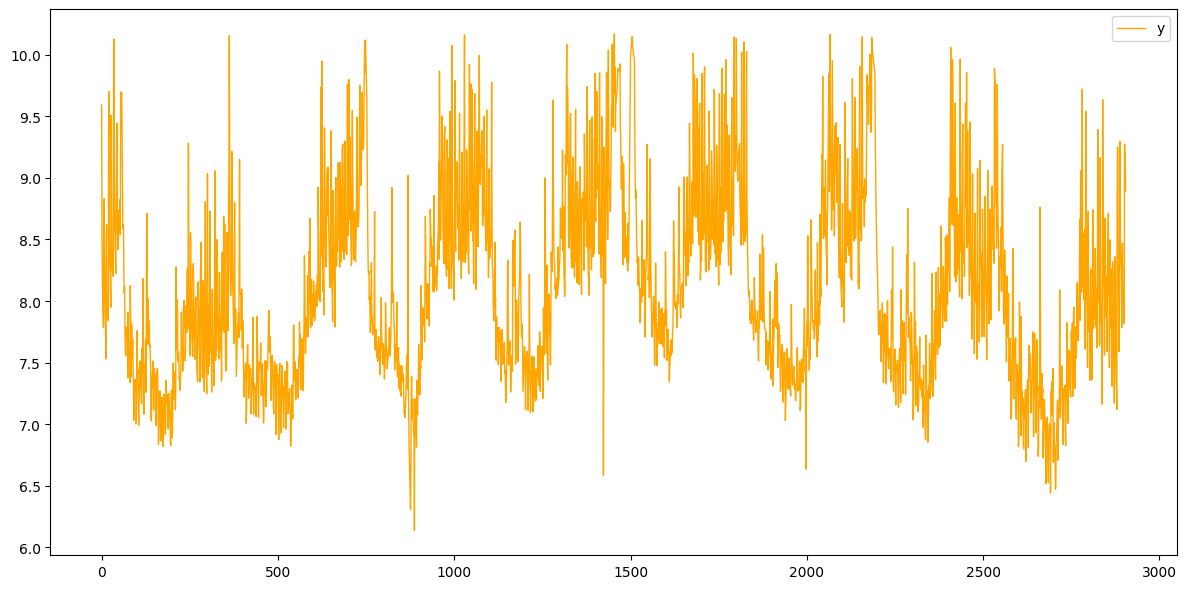

In [4]:
plt.figure(figsize=(12,6))
plt.plot(df['y'], color='orange', label='y', lw=1)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Splitting dataset into training and testing dataset

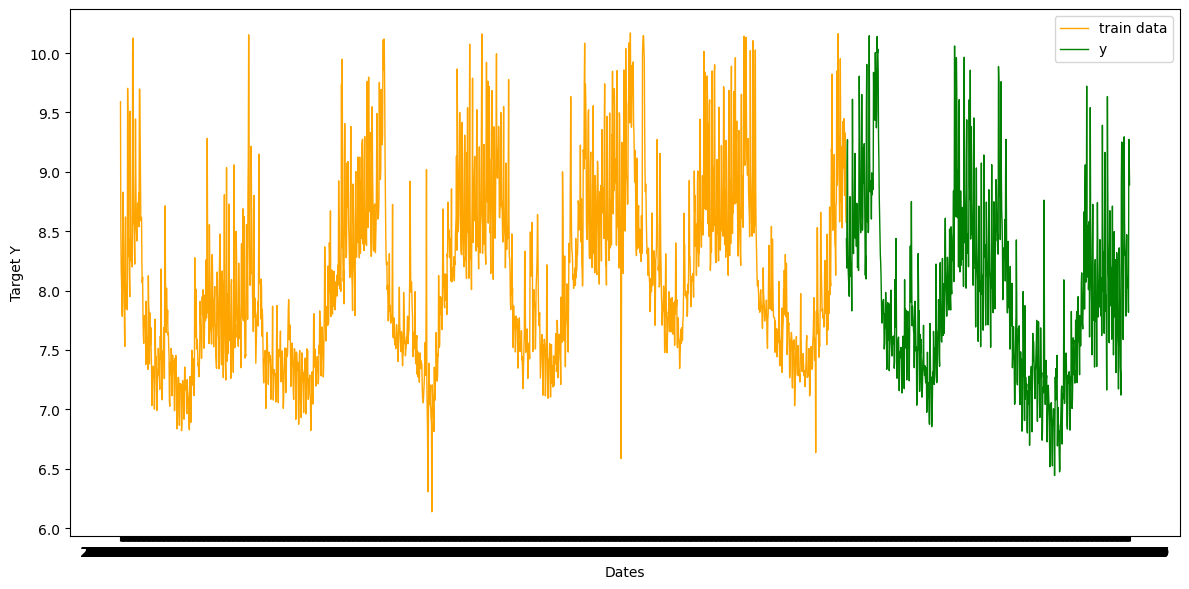

In [5]:
split = 2033
train = df.iloc[:split]
test = df.iloc[split:]

plt.figure(figsize=(12,6))
plt.plot(train['ds'], train['y'], color='orange', label='train data', lw=1)
plt.plot(test['ds'], test['y'], color='green', label='y', lw=1)
plt.legend(loc='best')
plt.xlabel('Dates')
plt.ylabel('Target Y')
plt.tight_layout()
plt.show()



### Modeling and fitting with training dataset

In [6]:
model = Prophet()
fitted_model = model.fit(train)


14:56:47 - cmdstanpy - INFO - Chain [1] start processing
14:56:47 - cmdstanpy - INFO - Chain [1] done processing


##### making test dataset as required by model

In [7]:
test_to_fit = test.drop('y', axis=1)
test_to_fit

,ds
2091,2013-10-25
2092,2013-10-26
2093,2013-10-27
2094,2013-10-28
2095,2013-10-29
...,...
2899,2016-01-15
2900,2016-01-16
2901,2016-01-17
2903,2016-01-19


### Forecasting using testing dataset

In [8]:
forecast = fitted_model.predict(test)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-10-25,8.064750,7.979788,8.953160,8.064750,8.064750,0.404794,0.404794,0.404794,-0.051844,-0.051844,-0.051844,0.456639,0.456639,0.456639,0.0,0.0,0.0,8.469545
1,2013-10-26,8.063755,7.774599,8.755618,8.063755,8.063755,0.199993,0.199993,0.199993,-0.244229,-0.244229,-0.244229,0.444222,0.444222,0.444222,0.0,0.0,0.0,8.263747
2,2013-10-27,8.062759,8.074005,9.078963,8.062759,8.062759,0.520746,0.520746,0.520746,0.090338,0.090338,0.090338,0.430408,0.430408,0.430408,0.0,0.0,0.0,8.583505
3,2013-10-28,8.061763,8.253701,9.198582,8.061763,8.061763,0.648570,0.648570,0.648570,0.233070,0.233070,0.233070,0.415500,0.415500,0.415500,0.0,0.0,0.0,8.710333
4,2013-10-29,8.060768,8.068351,9.022280,8.060768,8.060768,0.479270,0.479270,0.479270,0.079423,0.079423,0.079423,0.399847,0.399847,0.399847,0.0,0.0,0.0,8.540038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,2016-01-15,7.256278,6.903425,9.140072,6.348646,8.286070,0.696824,0.696824,0.696824,-0.051844,-0.051844,-0.051844,0.748668,0.748668,0.748668,0.0,0.0,0.0,7.953101
790,2016-01-16,7.255282,6.714876,8.907690,6.346426,8.286930,0.509309,0.509309,0.509309,-0.244229,-0.244229,-0.244229,0.753538,0.753538,0.753538,0.0,0.0,0.0,7.764591
791,2016-01-17,7.254286,7.090065,9.141776,6.343438,8.287790,0.848431,0.848431,0.848431,0.090338,0.090338,0.090338,0.758092,0.758092,0.758092,0.0,0.0,0.0,8.102717
792,2016-01-19,7.252295,7.079610,9.162015,6.339534,8.287687,0.845836,0.845836,0.845836,0.079423,0.079423,0.079423,0.766413,0.766413,0.766413,0.0,0.0,0.0,8.098131


### Visualising train, test and forecasted data

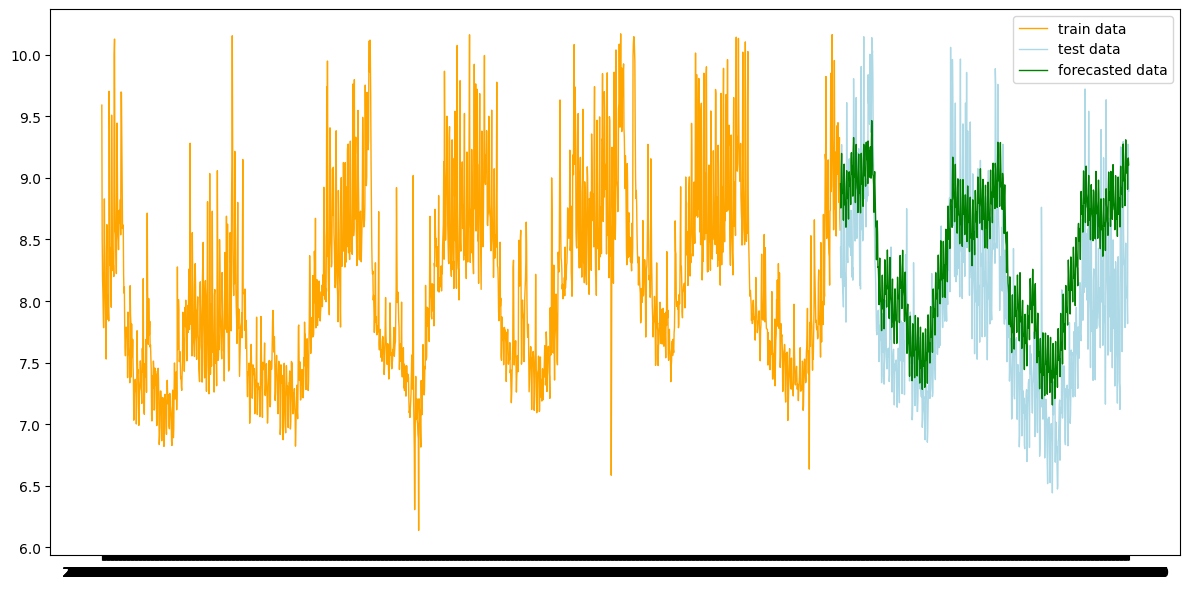

In [9]:
plt.figure(figsize=(12,6))
plt.plot(train['ds'],train['y'], color='orange', label='train data', lw=1)
plt.plot(test['ds'], test['y'], color='lightblue', label='test data', lw=1)
plt.plot(test['ds'], forecast['yhat_upper'], color='green', label='forecasted data', lw=1)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Evaluating the model for its accuracy

In [10]:
import numpy as np

y_true = np.array(test['y'])
y_pred = np.array(forecast['yhat_upper'])

print(f'Mean: ', test['y'].mean())

mse = np.mean((y_true - y_pred) ** 2)
print("MSE:", mse)

rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

nrmse = rmse / (max(y_true) - min(y_true))
print(f'Normalised RMSE: {nrmse}')

Mean:  7.958700911309318
MSE: 0.3438692961893163
RMSE: 0.59
Normalised RMSE: 0.15833261859903458
